<a href="https://colab.research.google.com/github/H0sseinR0stami/DeepLearningProjects/blob/main/Image_classification/Bee_with_pollen_detection/pollen_with_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Model,load_model
from keras.applications.mobilenet_v3 import MobileNetV3Large , preprocess_input
import keras

In [ ]:
%matplotlib inline

Model building

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
baseModel=MobileNet(input_shape=(224,224,3),include_top=False)

Preparing Data useing Data Generator

In [ ]:
def preprocessingImages_train(path):
  """
  input : path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path , target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/train"
train_data = preprocessingImages_train(path)

Found 489 images belonging to 2 classes.


In [ ]:
def preprocessingImages_test(path):
  """
  input : path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path , target_size=(224,224), batch_size=32, class_mode='binary')
  return image

In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/test"
test_data = preprocessingImages_test(path)

Found 96 images belonging to 2 classes.


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/validation"
val_data = preprocessingImages_test(path)

Found 96 images belonging to 2 classes.


In [ ]:
for layer in baseModel.layers:
  layer.trainable=False

In [ ]:
#baseModel.summary()
X=Flatten()(baseModel.output)
X=Dense(units=1,activation='sigmoid')(X)
model =Model(baseModel.input,X)

In [ ]:
#model.summary()
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/MobileNetv3.h6", monitor='val_accuracy',verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
cb=[mc,es]

In [ ]:
hist=model.fit_generator(train_data,epochs=30,validation_data=val_data, callbacks=cb)

Epoch 1/30
16/16 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.9264
Epoch 00001: val_accuracy improved from -inf to 0.93750, saving model to /content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/MobileNetv3.h6
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/MobileNetv3.h6/assets
16/16 [==============================] - 23s 1s/step - loss: 0.2909 - accuracy: 0.9264 - val_loss: 0.3215 - val_accuracy: 0.9375
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9509
Epoch 00002: val_accuracy did not improve from 0.93750
16/16 [==============================] - 8s 516ms/step - loss: 0.2174 - accuracy: 0.9509 - val_loss: 0.3150 - val_accuracy: 0.9167
Epoch 3/30
16/16 [==============================] - ETA: 0s - loss: 0.1545 - accuracy: 0.9611
Epoch 00003: val_accuracy did not improve from 0.93750
16/16 [==============================] - 8s 538ms/step - loss: 0.1545 - accuracy: 0.9611 

In [ ]:
model = load_model("/content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/MobileNetv3.h6")

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"Accuracy={100*acc}%")

Accuracy=96.875%


In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'acc vs val-acc')

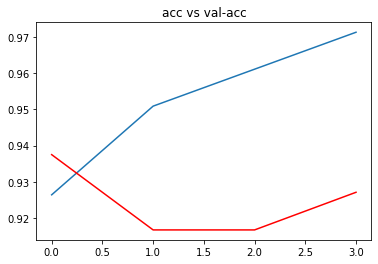

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c= 'red')

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'acc vs val-acc')

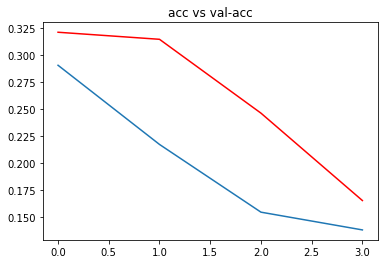

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c= 'red')

plt.title("acc vs val-acc")

Model accuracy

In [ ]:
from keras.preprocessing import image

In [ ]:
train_data.class_indices

{'not_pollen_carrying': 0, 'pollen_carrying': 1}

not_pollen_carrying


<function matplotlib.pyplot.show>

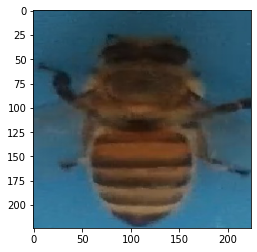

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/pollen_dataset/not_pollen_carrying/NP13481-205r.jpg'

img = image.load_img(path,target_size=(224,224))
i = image.img_to_array(img)/255
input_arr = np.expand_dims(i, axis = 0)
pred = (model.predict(input_arr)>0.5).astype("int32")[0][0]
if pred == 0:
  print("not_pollen_carrying")
else:
  print("pollen_carrying")

plt.imshow(input_arr[0])
plt.show


pollen_carrying


<function matplotlib.pyplot.show>

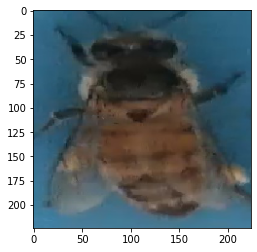

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/pollen_dataset/pollen_carrying/P53341-40r.jpg'

img = image.load_img(path,target_size=(224,224))
i = image.img_to_array(img)/255
input_arr = np.expand_dims(i, axis = 0)
pred = (model.predict(input_arr)>0.5).astype("int32")[0][0]
if pred == 0:
  print("not_pollen_carrying")
else:
  print("pollen_carrying")

plt.imshow(input_arr[0])
plt.show

